## **About This Project**

**Background**

Heart failure is one of causes Cardiovascular diseases (CVDs) that approximately 17 million people globally every year (Chicco 2020). In that situation, we need some prevention to predict posibility of someone getting heart failure early. Available medical record from several patient and their living behavior will be use in this project to build model prediction that expected can detect heart failure early.

**Data Overview**

1. Age : Age of patient
2. Anemia : If patient has anemia (decrease of red blood cells or hemoglobin)
3. Creatinine_pospokinase : level of creatine in blood that can indicate there are injury from brain,heart,or muscle (mcg/L).
4. Diaetes : if patient has diabetes
5. Ejection_fraction : Percentage of blood leaving the hearth at each heart muscle constraction (percentage)
6. High_blood_pressure : if the patient has hypertension history
7. Platelets : level of platelets in blood (kiloplatelets/mL).
8. Serum_creatinine : level of serum creatinine in blood that can measure how good kidney function (mg/dL).
9. Serum_sodium : Level of serum sodium in the blood that can measure balance of electrolyte and water in blood vessels (mEq/L).
10. Sex : Women or Man (Non biner is not accepted)
11. Smoking : if the patient is smoker or not
12. Time : Follow-up perioed (days)
13. Death_event : if the patient deceased during the follow-up period

## **Preparation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Load Dataset

In [3]:
# Load data
sc= r'C:\Users\fahru\Documents\Python_Code\Prediction Model\heart_failure_clinical_records_dataset.csv'
data=pd.read_csv(sc)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Data Understanding

**NOTE**

Patient clasified on 'Death_Event':

- 0 : survived patient 
- 1 : deceased patient

Patient clasifeid on 'sex':

- 0 : Women
- 1 : Male 

Patient clasified on another bolean data type(aneamia,diabetes,high_blood_fraction,smoking)

- 0 : Negative 
- 1 : positive

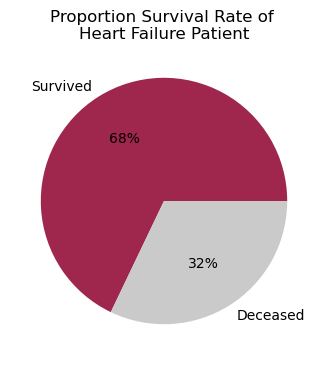

In [96]:
# Distribution of Dead Patient
die= data.groupby('DEATH_EVENT')['age'].count().reset_index()

plt.figure(figsize=(7,4))
plt.pie(die['age'],labels=['Survived','Deceased'],autopct='%.0f%%', colors=["#9F274D","#CACACA"])
plt.title('Proportion Survival Rate of \nHeart Failure Patient')
plt.show()

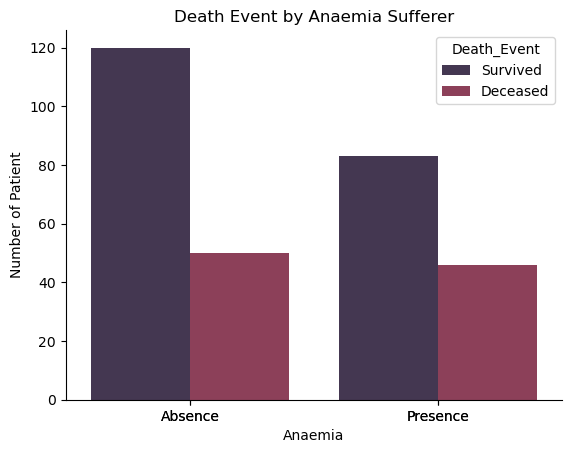

In [97]:
# Distribution of Aneamia patient
coba= data.groupby('anaemia')['DEATH_EVENT'].value_counts().reset_index()

ax= sns.barplot(data=coba, x=coba['anaemia'], y=coba['count'], hue= coba['DEATH_EVENT'], palette=['#4353','#9353'])

handles, current= ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Survived','Deceased'], title='Death_Event')
plt.xticks(coba['anaemia'],labels=['Negative','Absence','Positive','Presence'])
plt.xlabel('Anaemia')
plt.ylabel('Number of Patient')

sns.despine(bottom=False, left=False)
plt.title('Death Event by Anaemia Sufferer')
plt.show()

In [5]:
# Distribution of Diabetes Patient

diabet_all = data.groupby('diabetes')['DEATH_EVENT'].count().reset_index(name='Number of Patient')
diabet_dead = data[data['DEATH_EVENT']==1].groupby('diabetes')['DEATH_EVENT']\
            .count().reset_index(name='Number of Patient')

print('Distribution of all patient')
print(diabet_all)
print('\nDistribution of dead patient')
print(diabet_dead)

Distribution of all patient
   diabetes  Number of Patient
0         0                174
1         1                125

Distribution of dead patient
   diabetes  Number of Patient
0         0                 56
1         1                 40


In [6]:
# Distribution of High Blood Presure Patient

blood_all = data.groupby('high_blood_pressure')['DEATH_EVENT'].count().reset_index(name='Number of Patient')
blood_dead = data[data['DEATH_EVENT']==1].groupby('high_blood_pressure')['DEATH_EVENT']\
            .count().reset_index(name='Number of Patient')

print('Distribution of all patient')
print(blood_all)
print('\nDistribution of dead patient')
print(blood_dead)

Distribution of all patient
   high_blood_pressure  Number of Patient
0                    0                194
1                    1                105

Distribution of dead patient
   high_blood_pressure  Number of Patient
0                    0                 57
1                    1                 39


**NOTE**

Patient Clasified on 'Sex':

- 0 : Women
- 1 : Male

In [7]:
# Distribution of Sex Patient

sex_all = data.groupby('sex')['DEATH_EVENT'].count().reset_index(name='Number of Patient')
sex_dead = data[data['DEATH_EVENT']==1].groupby('sex')['DEATH_EVENT']\
            .count().reset_index(name='Number of Patient')

print('Distribution of all patient')
print(sex_all)
print('\nDistribution of dead patient')
print(sex_dead)

Distribution of all patient
   sex  Number of Patient
0    0                105
1    1                194

Distribution of dead patient
   sex  Number of Patient
0    0                 34
1    1                 62


In [8]:
# Distribution of Smoker Patient

smoke_all = data.groupby('smoking')['DEATH_EVENT'].count().reset_index(name='Number of Patient')
smoke_dead = data[data['DEATH_EVENT']==1].groupby('smoking')['DEATH_EVENT']\
            .count().reset_index(name='Number of Patient')

print('Distribution of all patient')
print(smoke_all)
print('\nDistribution of dead patient')
print(smoke_dead)

Distribution of all patient
   smoking  Number of Patient
0        0                203
1        1                 96

Distribution of dead patient
   smoking  Number of Patient
0        0                 66
1        1                 30


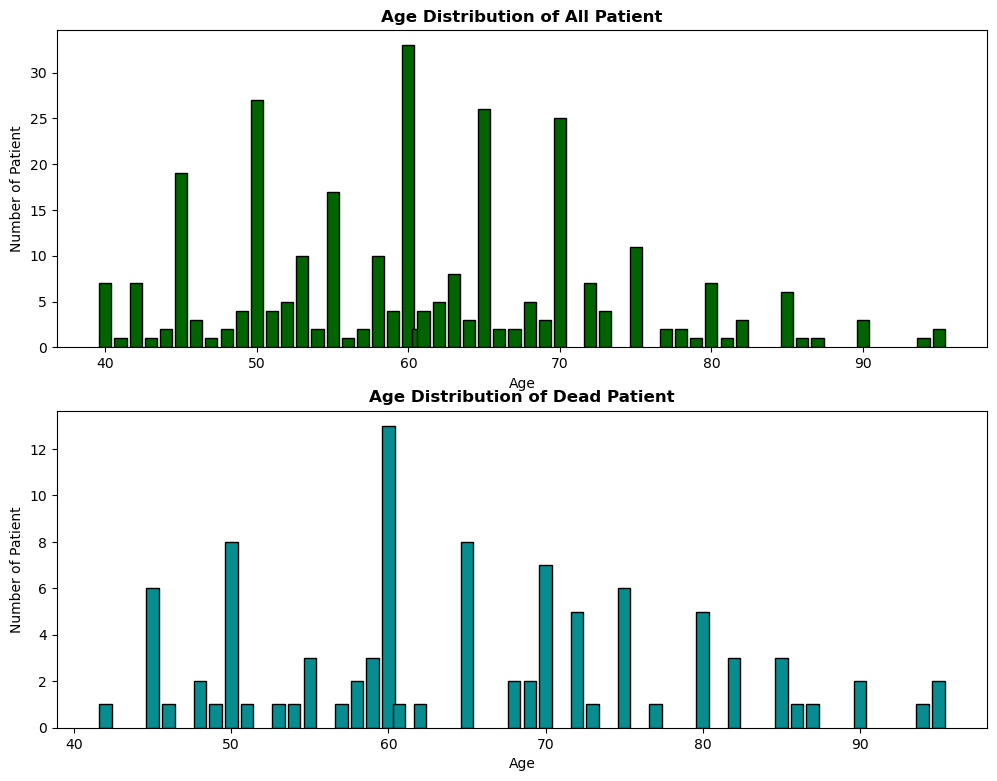

In [9]:
# Distribution of Age Patient 

age_all = data.groupby('age')['DEATH_EVENT'].count().reset_index(name='Number of Patient')
age_dead = data[data['DEATH_EVENT']==1].groupby('age')['DEATH_EVENT']\
            .count().reset_index(name='Number of Patient')

# Create Visualization

plt.figure(figsize=(12,14))

plt.subplot(311)
plt.bar(x=age_all['age'], height=age_all['Number of Patient'], color='darkgreen', edgecolor='black')
# plt.xticks(age_all['age'], labels= age_all['age'], fontsize=7)
plt.xlabel('Age')
plt.ylabel('Number of Patient')
plt.title('Age Distribution of All Patient', fontweight='bold')

plt.subplot(312)
plt.bar(x=age_dead['age'], height=age_dead['Number of Patient'], color='#078D8F', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patient')
plt.title('Age Distribution of Dead Patient', fontweight='bold')

plt.show()

## **Data Preparation**

In [10]:
# Duplicate Data Check
data.duplicated().sum()

np.int64(0)

In [11]:
# Data null Check
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **Data Transformation**

### Seperate Predictor Data

Seperate independent(predictor data) and dependent value from table. In this case dependent data is DEATH_EVENT values. 

In [13]:
# Seperate data
predic= data[data.columns.difference(['DEATH_EVENT'])]
predic.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


### Seperate Categorical and Numerical Data

Encoding for every categorycal data:
- anaemia
- diabetes
- high_blood_pressure
- sex
- smoking

In [14]:
# Change data type
predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']] = predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']].astype(str)

C:\Users\fahru\AppData\Local\Temp\ipykernel_21420\1120734859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']] = predic[['anaemia','diabetes','high_blood_pressure','sex','smoking']].astype(str)


In [15]:
predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 28.2+ KB


In [16]:
# Encoding categorical data with integer value
predic= pd.get_dummies(predic, dtype=int)
predic

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,1,0,0,1,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,7,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,2.7,116,8,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270,1,0,0,1,0,1,0,1,0,1
295,55.0,1820,38,270000.00,1.2,139,271,1,0,1,0,1,0,1,0,1,0
296,45.0,2060,60,742000.00,0.8,138,278,1,0,0,1,1,0,1,0,1,0
297,45.0,2413,38,140000.00,1.4,140,280,1,0,1,0,1,0,0,1,0,1


In [17]:
# Identify categorycal columns
cat_col= predic.columns[7:]
cat_col

Index(['anaemia_0', 'anaemia_1', 'diabetes_0', 'diabetes_1',
       'high_blood_pressure_0', 'high_blood_pressure_1', 'sex_0', 'sex_1',
       'smoking_0', 'smoking_1'],
      dtype='object')

In [18]:
# Identify numerical columns
num_col= predic.columns[:7]
num_col

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

In [19]:
# Define Numerical and categorycal data

pred_num = predic[num_col]
pred_cat = predic[cat_col]

### Standardization Numerical Data

In [20]:
# Standardization
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
pred_num= pd.DataFrame(std.fit_transform(pred_num))
pred_num.head()

,0,1,2,3,4,5,6
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [21]:
# Change Columns Name After Standardization
pred_num.columns= num_col
pred_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


### Merge Predictor Data

In [22]:
# Merge All data
x1= pd.concat([pred_num,pred_cat], axis=1)
x1.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,1,0,1,0,0,1,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,1,0,1,0,1,0,0,1,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,1,0,1,0,1,0,0,1,0,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,0,1,1,0,1,0,0,1,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,0,1,0,1,1,0,1,0,1,0


In [23]:
# Define Dependent data
y1= data['DEATH_EVENT']

## **Correlation Check**

Check correalation between independent variabel to avoid high influence of each variabel. Variabels with correlation value more than 0.7 will be drop because indicate high correaltion.

In [24]:
# Correlation Chenck Matrix
cek= x1.corr().abs()
cek

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
age,1.000000,0.081584,0.060098,0.052354,0.159187,0.045966,0.224068,0.088006,0.088006,0.101012,0.101012,0.093289,0.093289,0.065430,0.065430,0.018668,0.018668
creatinine_phosphokinase,0.081584,1.000000,0.044080,0.024463,0.016408,0.059550,0.009346,0.190741,0.190741,0.009639,0.009639,0.070590,0.070590,0.079791,0.079791,0.002421,0.002421
ejection_fraction,0.060098,0.044080,1.000000,0.072177,0.011302,0.175902,0.041729,0.031557,0.031557,0.004850,0.004850,0.024445,0.024445,0.148386,0.148386,0.067315,0.067315
platelets,0.052354,0.024463,0.072177,1.000000,0.041198,0.062125,0.010514,0.043786,0.043786,0.092193,0.092193,0.049963,0.049963,0.125120,0.125120,0.028234,0.028234
serum_creatinine,0.159187,0.016408,0.011302,0.041198,1.000000,0.189095,0.149315,0.052174,0.052174,0.046975,0.046975,0.004935,0.004935,0.006970,0.006970,0.027414,0.027414
serum_sodium,0.045966,0.059550,0.175902,0.062125,0.189095,1.000000,0.087640,0.041882,0.041882,0.089551,0.089551,0.037109,0.037109,0.027566,0.027566,0.004813,0.004813
time,0.224068,0.009346,0.041729,0.010514,0.149315,0.087640,1.000000,0.141414,0.141414,0.033726,0.033726,0.196439,0.196439,0.015608,0.015608,0.022839,0.022839
anaemia_0,0.088006,0.190741,0.031557,0.043786,0.052174,0.041882,0.141414,1.000000,1.000000,0.012729,0.012729,0.038182,0.038182,0.094769,0.094769,0.107290,0.107290
anaemia_1,0.088006,0.190741,0.031557,0.043786,0.052174,0.041882,0.141414,1.000000,1.000000,0.012729,0.012729,0.038182,0.038182,0.094769,0.094769,0.107290,0.107290
diabetes_0,0.101012,0.009639,0.004850,0.092193,0.046975,0.089551,0.033726,0.012729,0.012729,1.000000,1.000000,0.012732,0.012732,0.157730,0.157730,0.147173,0.147173


In [25]:
# Remove Redundant Value From Matrix
upper=  cek.where(np.triu(np.ones(cek.shape), k=1).astype(bool))
upper

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
age,NaN,0.081584,0.060098,0.052354,0.159187,0.045966,0.224068,0.088006,0.088006,0.101012,0.101012,0.093289,0.093289,0.065430,0.065430,0.018668,0.018668
creatinine_phosphokinase,NaN,NaN,0.044080,0.024463,0.016408,0.059550,0.009346,0.190741,0.190741,0.009639,0.009639,0.070590,0.070590,0.079791,0.079791,0.002421,0.002421
ejection_fraction,NaN,NaN,NaN,0.072177,0.011302,0.175902,0.041729,0.031557,0.031557,0.004850,0.004850,0.024445,0.024445,0.148386,0.148386,0.067315,0.067315
platelets,NaN,NaN,NaN,NaN,0.041198,0.062125,0.010514,0.043786,0.043786,0.092193,0.092193,0.049963,0.049963,0.125120,0.125120,0.028234,0.028234
serum_creatinine,NaN,NaN,NaN,NaN,NaN,0.189095,0.149315,0.052174,0.052174,0.046975,0.046975,0.004935,0.004935,0.006970,0.006970,0.027414,0.027414
serum_sodium,NaN,NaN,NaN,NaN,NaN,NaN,0.087640,0.041882,0.041882,0.089551,0.089551,0.037109,0.037109,0.027566,0.027566,0.004813,0.004813
time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141414,0.141414,0.033726,0.033726,0.196439,0.196439,0.015608,0.015608,0.022839,0.022839
anaemia_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.012729,0.012729,0.038182,0.038182,0.094769,0.094769,0.107290,0.107290
anaemia_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012729,0.012729,0.038182,0.038182,0.094769,0.094769,0.107290,0.107290
diabetes_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.012732,0.012732,0.157730,0.157730,0.147173,0.147173


In [26]:
# Search Value more than 0.7
list_drop = [col for col in upper.columns if any(upper[col]>0.7)]
list_drop

['anaemia_1', 'diabetes_1', 'high_blood_pressure_1', 'sex_1', 'smoking_1']

In [27]:
# Drop Columns That Has High Corr
x1= x1.drop(columns=list_drop, axis=1)
x1.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,diabetes_0,high_blood_pressure_0,sex_0,smoking_0
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,1,1,0,0,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,1,1,1,0,1
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,1,1,1,0,0
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,0,1,1,0,1
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,0,0,1,1,1


## **Splitting Dataset**

Split Data set for better model work:

- train : for train the model to predict 
- test : for test the model from the predict

This method is important to avoid 'overfitting' that model to much fit with test data.

In [28]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.3, stratify=y1, random_state=30)
print(len(x1_train))
print(len(x1_test))

209
90


## **Modeling**

Use three algorithm:
- linear Regression
- Gradient Boosting
- Random Forest

In [29]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Linear Regression

In [30]:
# Define Hyperparameter
penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept,
                           intercept_scaling=intercept_scaling,
                           class_weight=class_weight, solver=solver, max_iter=max_iter)

In [31]:
# Create Model
from sklearn.model_selection import GridSearchCV

# Cross Validation
method= LogisticRegression()
grid= GridSearchCV(estimator=method, param_grid=param_distributions, scoring='recall', cv=5, n_jobs=-1)

start= time.time()
grid_result= grid.fit(x1_train,y1_train)

# Summarize Result
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
print(f"Execution time:  {str((time.time() - start))} s")

Best: 0.8516483516483516 using {'C': 0.001, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Execution time:  97.12414526939392 s


### Gradient Boosting

In [32]:
# Define hyperparameter
gbparameter = {'max_depth':[5,10,15],'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25,50,75,100],'learning_rate':[0.05,0.1,0.2,0.3], 'scale_pos_weight':[1,3]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

In [33]:
# Create Model
from xgboost import XGBClassifier

gb_grid = GridSearchCV(XGBClassifier(), gbparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

start= time.time()
gb_result= gb_grid.fit(x1_train,y1_train)

# Summarize result
print(f'Best : {gb_result.best_score_} using {gb_result.best_params_}')
print(f'Execution time {str((time.time() - start))} s')

Best : 0.8373626373626374 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 50, 'scale_pos_weight': 3}
Execution time 37.59006452560425 s


### Random Forest

In [34]:
# Define Hyperparameter
rfparameter = {'max_depth':[5,10,15,20],'max_features':['auto','sqrt','log2'], 'n_estimators':[25,50,75,100,125],'min_samples_split':[2,3,5,7]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

In [35]:
# Create Model
from sklearn.ensemble import RandomForestClassifier

rf_grid = GridSearchCV(RandomForestClassifier(), rfparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

start= time.time()
rf_result= rf_grid.fit(x1_train,y1_train)

# Summarize Result
print(f'Best : {rf_result.best_score_} using {rf_result.best_params_}')
print(f'Execution time {str((time.time() - start))} s')

Best : 0.7494505494505495 using {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 75}
Execution time 17.327600479125977 s


c:\Users\fahru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
191 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fahru\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fahru\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\fahru\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


## **Evaluation**

### Linear Regression

In [36]:
# Evaluation Linear Regression Model
from sklearn import metrics

y1_pred= grid.predict(x1_test)

print('Accuracy :', metrics.accuracy_score(y1_test,y1_pred))
print('Recall: ', metrics.recall_score(y1_test,y1_pred))

Accuracy : 0.7555555555555555
Recall:  0.896551724137931


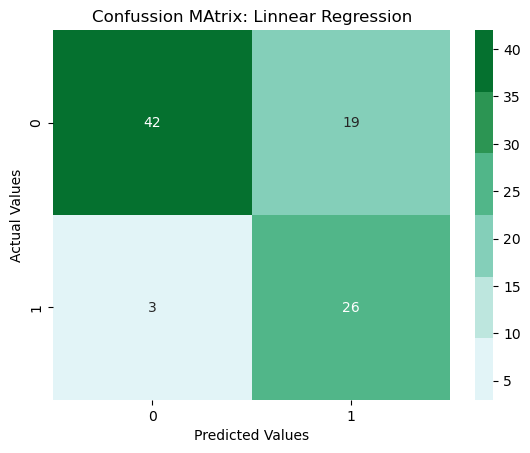

In [37]:
# Build Confussion Matrix

confus= confusion_matrix(y1_test,y1_pred)
sns.heatmap(confus, annot=True, cmap=sns.color_palette('BuGn'))
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confussion MAtrix: Linnear Regression')

plt.show()

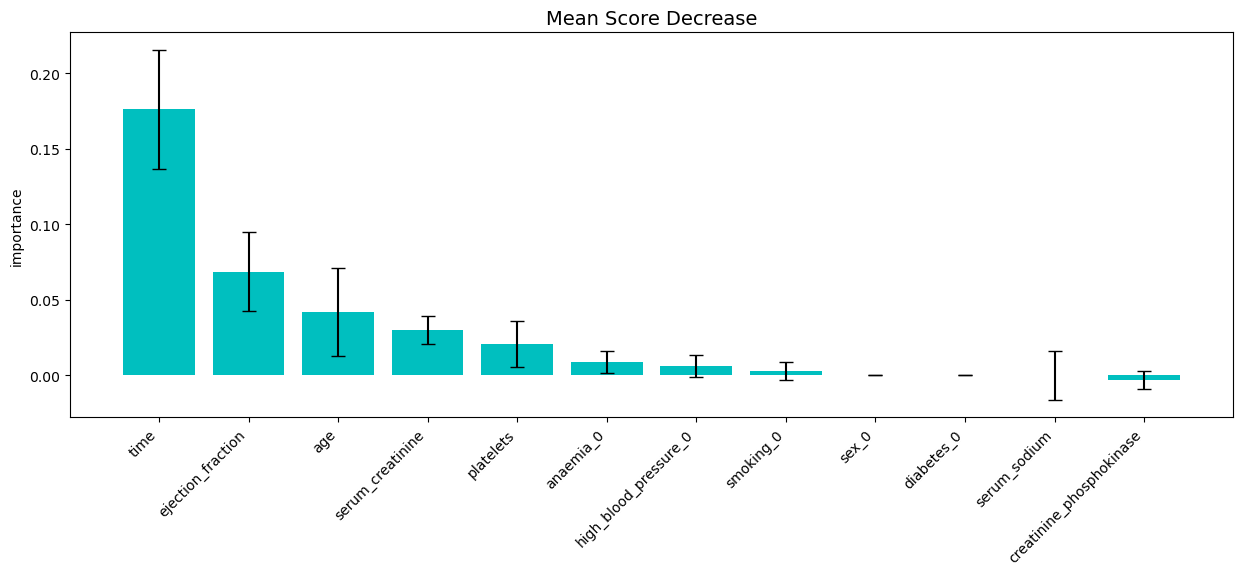

In [38]:
# Check most considered varaible from model to predict
from jcopml.feature_importance import mean_score_decrease

cek1= mean_score_decrease(x1_train,y1_train, grid, plot=True, topk=20)

### Gradient Boosting

In [39]:
# Evaluation Gradient Boosting Model
from sklearn import metrics

y1_pred_gb= gb_grid.predict(x1_test)

print('Accuracy :', metrics.accuracy_score(y1_test,y1_pred_gb))
print('Recall: ', metrics.recall_score(y1_test,y1_pred_gb))

Accuracy : 0.7666666666666667
Recall:  0.7586206896551724


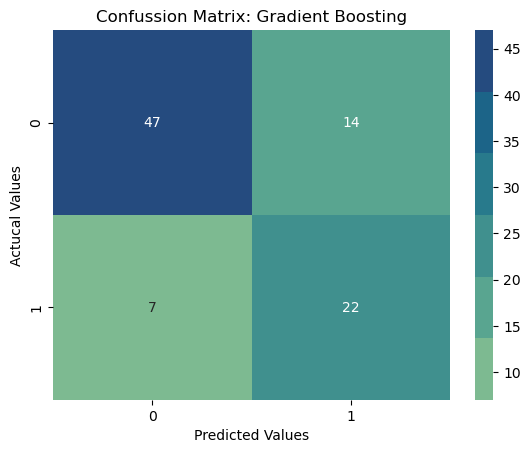

In [40]:
# Build Confussion Matrix

confus= confusion_matrix(y1_test,y1_pred_gb)
sns.heatmap(confus, annot=True, cmap=sns.color_palette('crest'))
plt.xlabel('Predicted Values')
plt.ylabel('Actucal Values')

plt.title('Confussion Matrix: Gradient Boosting')
plt.show()

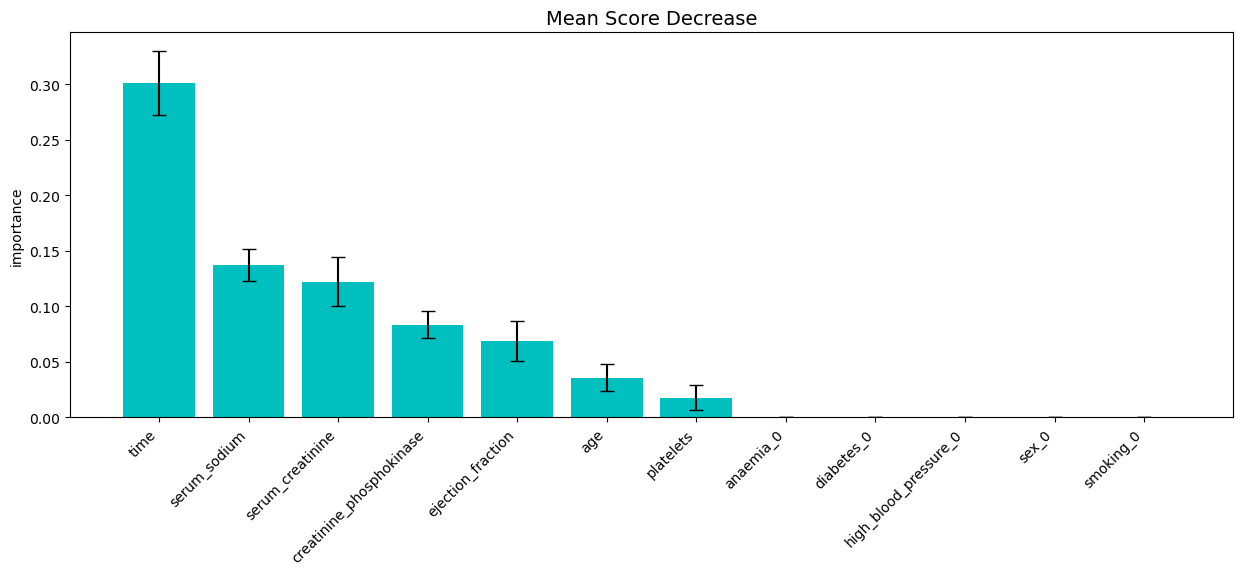

In [41]:
# Check Most Considered Variable from Model to Predict

cek2= mean_score_decrease(x1_train,y1_train, gb_grid, plot=True, topk=20)

### Random Forest

In [42]:
# Evaluation Random Forest Model
from sklearn import metrics

y1_pred_rf= rf_grid.predict(x1_test)

print('Accuracy: ', metrics.accuracy_score(y1_test,y1_pred_rf))
print('Recall: ', metrics.accuracy_score(y1_test,y1_pred_rf))

Accuracy:  0.8444444444444444
Recall:  0.8444444444444444


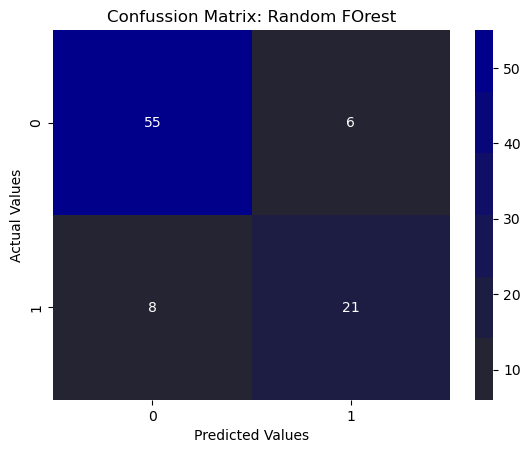

In [43]:
# Create Confussion Metrix

confus= confusion_matrix(y1_test,y1_pred_rf)
sns.heatmap(confus, annot=True, cmap=sns.dark_palette('darkblue'))
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.title('Confussion Matrix: Random FOrest')
plt.show()

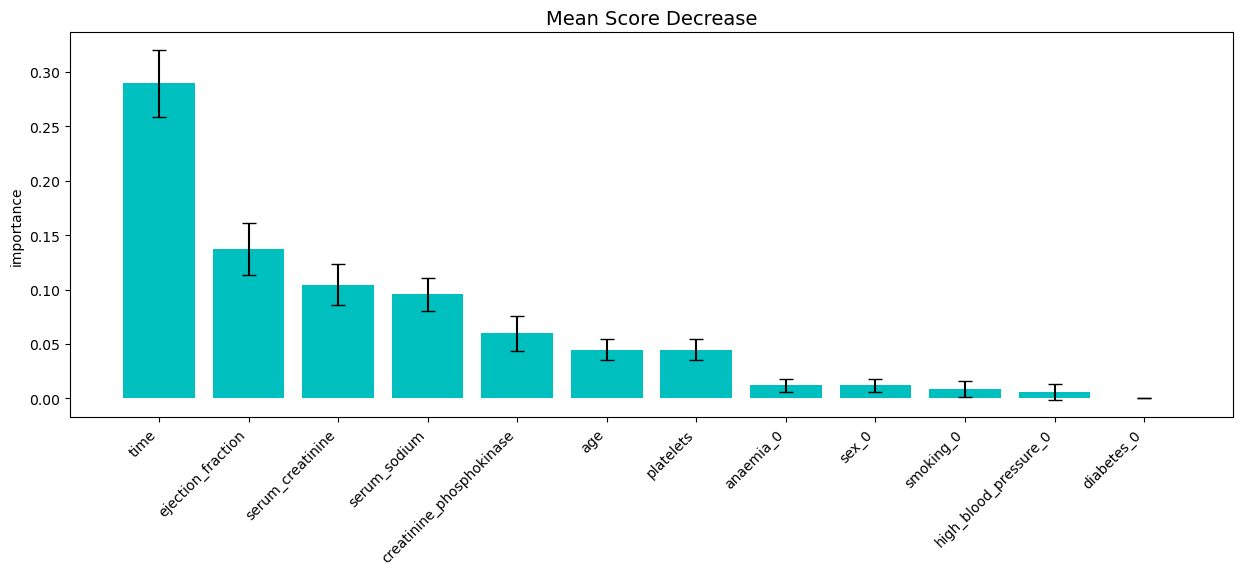

In [44]:
# Check Most Considered Variabels from Model to Predict

cek3= mean_score_decrease(x1_train,y1_train, rf_grid, plot='bar', topk=20)

## **Result**

The best recall result is in Linier Regression which give result 89%. That result means the performance model is good enough to predict potential deadly heart disease, however there are around 10% probability that model failed to predict the corect one. Need more data or another modeling to increase recall rate for avoid model predict false negative.

The result shows most considered variable from model to predcit is time. Lets, deep dive again about this variable.

In [52]:
# Clasify time(day) to month
def bulan(x):
    if x['time']<=30:
        return 1
    elif x['time']<=60:
        return 2
    elif x['time']<=90:
        return 3
    elif x['time']<=120:
        return 4
    elif x['time']<=150:
        return 5
    elif x['time']<=180:
        return 6
    elif x['time']<=210:
        return 7
    elif x['time']<=240:
        return 8
    elif x['time']<=270:
        return 9
    elif x['time']<=300:
        return 10
    else:
        return np.nan
data['month']= data.apply(bulan, axis=1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,month
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1


In [ ]:
# Check MAx time
data['time'].sort_values(ascending=False)   ## Time(day) is no more than 298 day

298    285
297    280
296    278
295    271
294    270
      ... 
4        8
3        7
2        7
1        6
0        4
Name: time, Length: 299, dtype: int64

In [96]:
# Count Proportion of survived patient
propor= data.groupby('month')
propor= (1-propor['DEATH_EVENT'].mean())
propor= propor.reset_index()
propor

,month,DEATH_EVENT
0,1,0.125000
1,2,0.173913
2,3,0.705882
3,4,0.840909
4,5,0.791667
5,6,0.428571
6,7,0.906977
7,8,0.925926
8,9,0.965517
9,10,1.000000


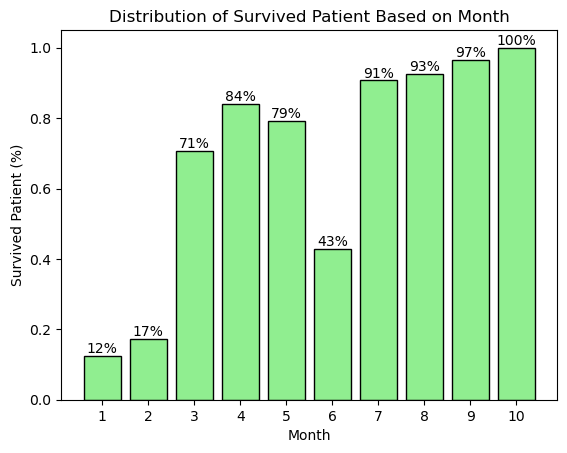

In [99]:
# Create Graph
ax= plt.bar(x=propor['month'], height=propor['DEATH_EVENT'],color='lightgreen',edgecolor='black')
plt.xticks(ticks=propor['month'], labels=propor['month'])
plt.xlabel('Month')
plt.ylabel('Survived Patient (%)')
plt.bar_label(ax, fmt='{0:.0%}')

plt.title('Distribution of Survived Patient Based on Month')
plt.show()

Based on graph above shows no linear trend. That indicated by survived rate patient in month 6 is lower than month 5 and bounch back in month 7. However,in generaly that graph also can shows longer time patient has follow up will increase probability to survived.

Need Another modeling to find crucial factors from medical field such as creatine level, anaemia, or many more.

## **References**

Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5